In [2]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix

In [3]:
###Loading the data set
hf_pred_data = pd.read_csv("C:/Users/chizu/OneDrive/Desktop/Bootcamp/week 7/heart_failure_clinical_records_dataset.csv")
hf_pred_data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
hf_pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
hf_pred_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
hf_pred_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

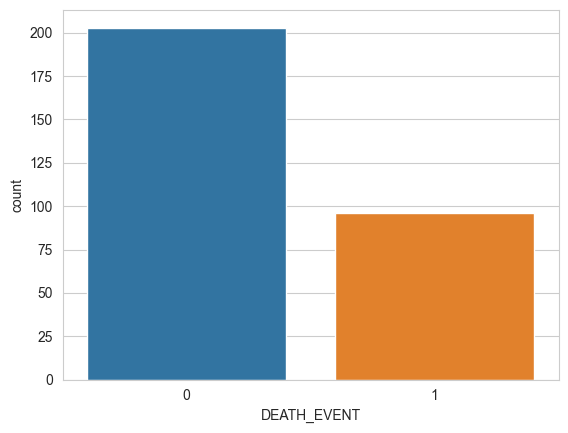

In [7]:
#Countplot of those who died VS those who survived.
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',  data=hf_pred_data)


In [8]:
#Assigning x and y variables before train_test_split
x = hf_pred_data.drop('DEATH_EVENT', axis = 1)
#y is the target variable.
y = hf_pred_data['DEATH_EVENT']

In [9]:
#Splitting into test and training data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [10]:
#Including early stopping to help save training time.
early_stop = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=40,
    restore_best_weights=True)

## Neural Network
## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 16, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.25))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [11]:
## train the model
history = model.fit(x_train, y_train, batch_size = 32, epochs = 500, callbacks=[early_stop], validation_split= 0.2)

Epoch 1/500
6/6 [==============================] - 1s 55ms/step - loss: 7.6051 - accuracy: 0.5288 - val_loss: 4.6575 - val_accuracy: 0.2500
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 3.5682 - accuracy: 0.4869 - val_loss: 1.8983 - val_accuracy: 0.7500
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 1.9272 - accuracy: 0.6335 - val_loss: 0.5832 - val_accuracy: 0.7500
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.9951 - accuracy: 0.4712 - val_loss: 0.7757 - val_accuracy: 0.2500
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 0.7198 - accuracy: 0.5393 - val_loss: 0.6314 - val_accuracy: 0.7500
Epoch 6/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6543 - accuracy: 0.6597 - val_loss: 0.6434 - val_accuracy: 0.7500
Epoch 7/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6643 - accuracy: 0.6597 - val_loss: 0.6392 - val_accuracy: 0.7500
Epoch 8/500
6/6 [===

In [12]:
## make prediction
y_pred_ann = model.predict(x_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

2/2 [==============================] - 0s 4ms/step


In [13]:
print(y_test.shape)
print(y_pred_ann.shape)

(60,)
(60, 1)


In [14]:
##classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



c:\Users\chizu\OneDrive\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chizu\OneDrive\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chizu\OneDrive\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
conf_matx = confusion_matrix(y_test, y_pred_ann)
conf_matx

array([[41,  0],
       [19,  0]], dtype=int64)

In [16]:
#########Using SVM###################
classifier = svm.SVC(kernel = 'linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [17]:
#####Model Evaluation####
x_train_pred = classifier.predict(x_train)
train_accuracy = accuracy_score(x_train_pred,y_train)

In [20]:
print("The accuracy of the train data using SVM is", train_accuracy)

The accuracy of the train data using SVM is 0.8284518828451883


In [21]:
x_test_pred = classifier.predict(x_test)
test_accuracy = accuracy_score(x_test_pred,y_test)

In [23]:
print("The accuracy of the testing data using SVM is", test_accuracy)

The accuracy of the testing data using SVM is 0.8166666666666667
